In [14]:
import pandas as pd
import numpy as np

In [15]:
df =pd.read_csv('breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [16]:
df.shape

(569, 31)

In [17]:
# split into X and y

X =df.iloc[:,:-1]
y =df.outcome

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

In [19]:
x_train.shape

(426, 30)

In [20]:
x_test.shape

(143, 30)

## Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')
model1.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
d_y_predict = model1.predict(x_test)
d_y_predict_train = model1.predict(x_train)

## Evaluating DTC

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
print('Testing Accuracy = ', accuracy_score(y_test,d_y_predict))
print('Training Accuracy = ', accuracy_score(y_train,d_y_predict_train))

Testing Accuracy =  0.958041958041958
Training Accuracy =  0.9835680751173709


In [25]:
print(classification_report(y_test,d_y_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



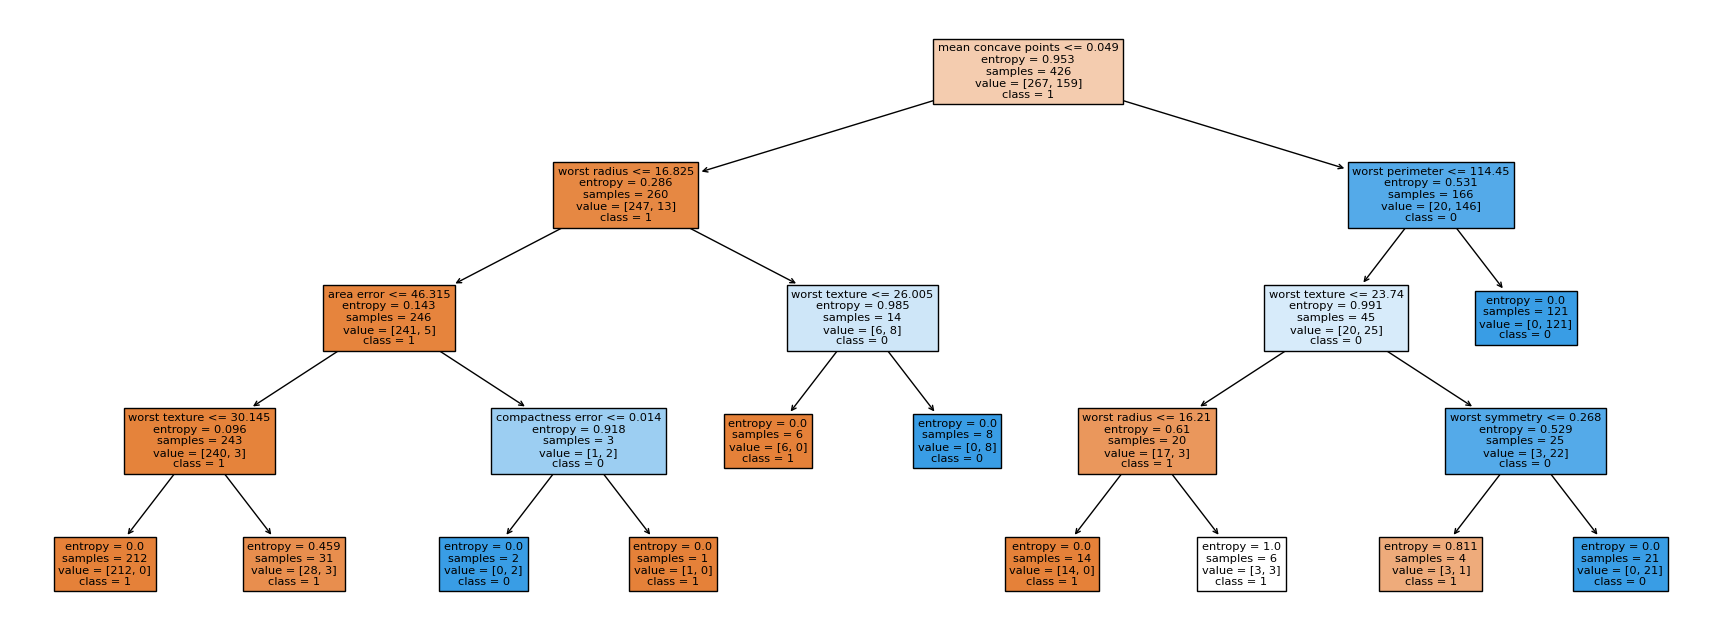

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
feature_names = list(df.columns[:-1]) 
class_names = [str(class_name) for class_name in df[df.columns[-1]].unique()]
plt.figure(figsize=(22, 8))
plot_tree(model1, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()
